In [1]:
#random event log splitting on train/test set

import random
import random as rand
import pandas as pd
import random as rand
import numpy as np
from random import choice
import string
from pm4py.objects.log.importer.xes import importer as xes_importer
import pm4py
import time
import random
import math
import pandas as pd
import random as rand
from random import choice
import string
from pm4py.objects.log.importer.xes import importer as xes_importer


log = xes_importer.apply("C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt.xes")
trace_counter = 0
for trace in log:
    trace_counter = trace_counter + 1
print('number of traces in log', trace_counter)
    
log = pm4py.convert_to_dataframe(log)


number_for_train = trace_counter / 100*30
number_for_train = int(number_for_train + (0.5 if number_for_train > 0 else -0.5))
print('Number of traces for train', number_for_train)


log2 = log["case:concept:name"].unique()
names_set =list(set(log2))
rand.shuffle(names_set)
train_set = names_set[0:int(number_for_train)]
test_set = names_set[int(number_for_train):int(trace_counter)]



train_df = pd.DataFrame(train_set)
train_df.rename(columns={0:'case:concept:name'},inplace=True)
test_df = pd.DataFrame(test_set)
test_df.rename(columns={0:'case:concept:name'},inplace=True)




fromtrain = pd.merge(log, train_df, how="inner", on="case:concept:name")

fromtest = pd.merge(log, test_df, how="inner", on="case:concept:name")


fromtrain.to_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt tracestrain.csv")
fromtest.to_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt tracestest.csv")


fromtrain = pd.read_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt tracestrain.csv") #sep=',')
fromtrain = pm4py.format_dataframe(fromtrain)  #case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
fromtrain = pm4py.convert_to_event_log(fromtrain)

for x in fromtrain:    #while converting back the to event log format,strange columns appears,thus, they have to be deleted    
    for y in x:
        del y["@@index"]
        del y["@@case_index"]
        del y["Unnamed: 0"]
pm4py.write_xes(fromtrain, "C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt tracetrain.xes")



fromtest = pd.read_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt tracestest.csv") #sep=',')
fromtest = pm4py.format_dataframe(fromtest)  #case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
fromtest = pm4py.convert_to_event_log(fromtest)

for x in fromtest:
    for y in x:
        del y["@@index"]
        del y["@@case_index"]
        del y["Unnamed: 0"]
pm4py.write_xes(fromtest, "C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt tracetest.xes")


C:\Users\I559643\Miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|███████████████████████████████████████████| 1434/1434 [00:00<00:00, 2649.53it/s]
C:\Users\I559643\Miniconda3\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


number of traces in log 1434
Number of traces for train 430


C:\Users\I559643\AppData\Local\Temp\ipykernel_36068\2318392552.py:66: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  fromtrain = pm4py.format_dataframe(fromtrain)  #case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
C:\Users\I559643\Miniconda3\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
exporting log, completed traces :: 100%|███████████████████████████████████████████| 430/430 [00:00<00:00, 2349.80it/s]
C:\Users\I559643\AppData\Local\Temp\ipykernel_36068\2318392552.py:79: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  fromtest = pm4py.format_da

parsing log, completed traces :: 100%|█████████████████████████████████████████████| 430/430 [00:00<00:00, 2027.25it/s]


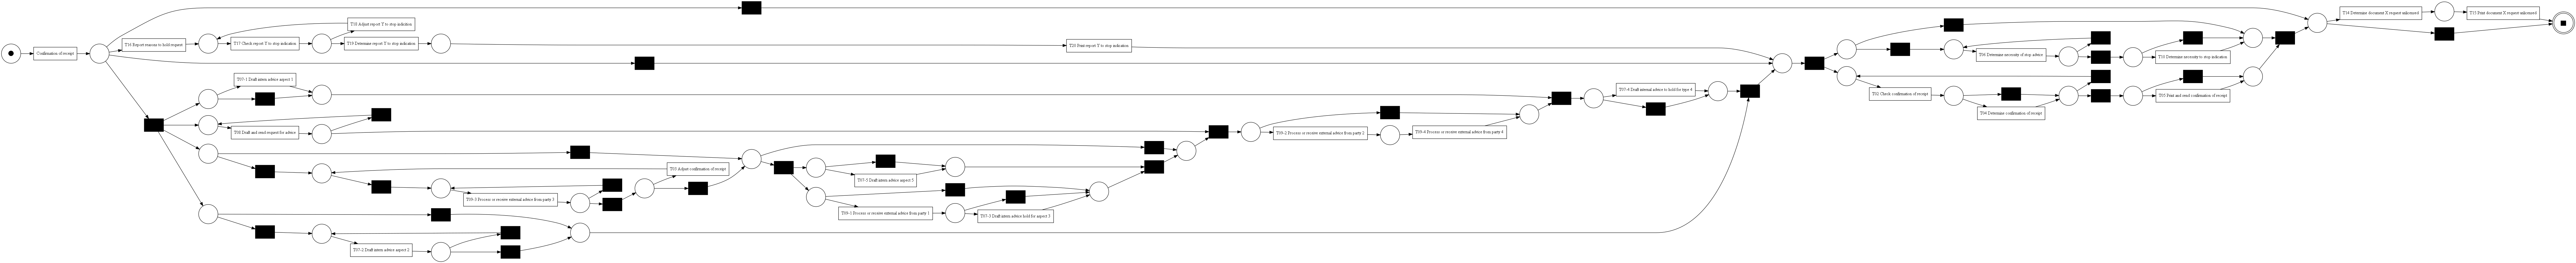

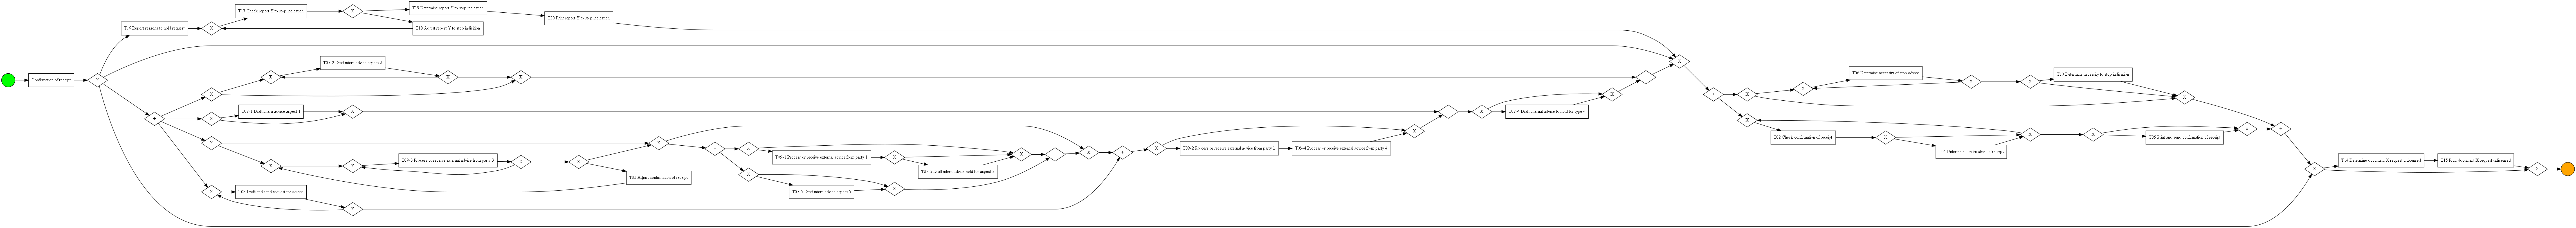

In [3]:
import pm4py
import time
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
import string
from pm4py.objects.log.importer.xes import importer as xes_importer




log = xes_importer.apply("C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt sample with 430 traces.xes")
net, im, fm = pm4py.discover_petri_net_inductive(log, noise_threshold = 0.2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.save_vis_petri_net(net, im, fm, 'C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt from tracestrain_test.png')
pn = pm4py.view_petri_net(net, im, fm)
pm4py.write_pnml(net, im, fm, 'C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt from tracestrain_IMf.pnml')
bpmn_graph = pm4py.convert_to_bpmn(net, im, fm)
pm4py.write_bpmn(bpmn_graph, "C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/receipt from tracestrain_IMf.bpmn")
pm4py.view_bpmn(bpmn_graph)